# Interacting species

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

## Helping functions

In [2]:
def plot_phase_portrait(
    dx_dt, ts, 
    xlim=np.array([-3, 3]), 
    ylim=np.array([-3, 3]), 
    title=None,
    ic_x = np.linspace(*[-3, 3], 9),
    ic_y = np.linspace(*[-3, 3], 9),
    linewidth=1):

    plt.figure(figsize=(6, 6))
    for r in ic_x:
        for s in ic_y:
            x0 = [r, s]
            xs = odeint(dx_dt, x0, ts)
            plt.plot(xs[:, 0], xs[:, 1], 'r-', linewidth=linewidth)

    X, Y = np.mgrid[xlim[0]:xlim[1]:15j, ylim[0]:ylim[1]:15j]
    u = a*X + b*Y
    v = c*X + d*Y
    plt.quiver(X, Y, u, v, color='b')

    plt.title(title)
    plt.xlim(np.array(xlim) * 1.1)
    plt.ylim(np.array(ylim) * 1.1)

plt.show()

In [46]:
def plot_traj(x0, dx_dt, fw=1, bw=1):
    xs = odeint(dx_dt, x0, np.linspace(0, fw, 100))
    plt.plot(xs[:, 0], xs[:, 1], 'r-', linewidth=1)
    
    xs = odeint(dx_dt, x0, np.linspace(0, bw, 100))
    plt.plot(xs[:, 0], xs[:, 1], 'r-', linewidth=1)

In [50]:
def plot_field(dx_dt, xlim, scale=100):
    X, Y = np.mgrid[xlim[0]:xlim[1]:15j, ylim[0]:ylim[1]:15j]
    u, v = dx_dt([X, Y], None)
    plt.quiver(X, Y, u, v, color='b', scale=scale)

## Competing species

### Coexisting

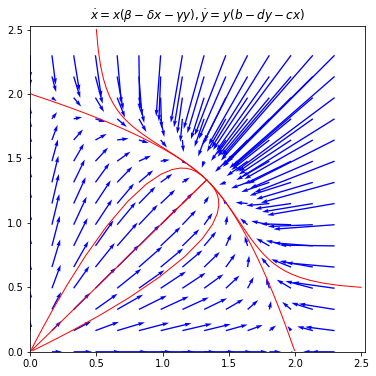

In [116]:
N = 2.3
xlim = (0, N)
ylim = (0, N)

beta, delta, gamma,  = 2, 1, 0.5
b, d, c = 2, 1, 0.5

def dx_dt(x, t):
    return [x[0]*(beta - delta*x[0] - gamma*x[1]), x[1]*(b - d*x[1] - c*x[0])]

plt.figure(figsize=(6, 6))
plt.title('$\\dot{x} = x(\\beta - \\delta x - \\gamma y), \\dot{y} = y(b - dy - cx)$')

plot_traj([1, 1], dx_dt, fw=10, bw=0)
plot_traj([0.01, 0.01], dx_dt, fw=0, bw=200)
plot_traj([0.02, 0.01], dx_dt, fw=0, bw=30)
plot_traj([0.01, 0.02], dx_dt, fw=0, bw=30)
plot_traj([0.01, 2], dx_dt, fw=10, bw=0)
plot_traj([2, 0.01], dx_dt, fw=10, bw=0)
plot_traj([0.5, 2.5], dx_dt, fw=10, bw=0)
plot_traj([2.5, 0.5], dx_dt, fw=10, bw=0)

plot_field(dx_dt, xlim, scale=10)

plt.xlim(np.array(xlim) * 1.1)
plt.ylim(np.array(ylim) * 1.1)

plt.show()

### One exticts depending on the initial conditions

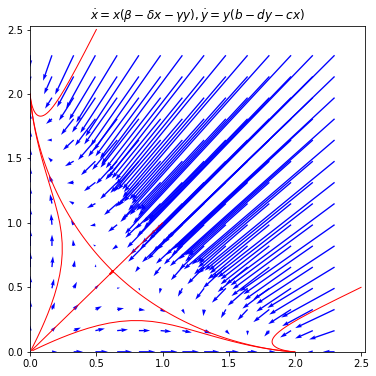

In [135]:
N = 2.3
xlim = (0, N)
ylim = (0, N)

beta, delta, gamma,  = 1, 0.5, 1.1
b, d, c = 1, 0.5, 1.1

def dx_dt(x, t):
    return [x[0]*(beta - delta*x[0] - gamma*x[1]), x[1]*(b - d*x[1] - c*x[0])]

plt.figure(figsize=(6, 6))
plt.title('$\\dot{x} = x(\\beta - \\delta x - \\gamma y), \\dot{y} = y(b - dy - cx)$')

plot_traj([1, 1], dx_dt, fw=10, bw=0)
plot_traj([0.01, 0.01], dx_dt, fw=0, bw=200)
plot_traj([0.02, 0.01], dx_dt, fw=0, bw=30)
plot_traj([0.01, 0.02], dx_dt, fw=0, bw=30)
plot_traj([0.5, 2.5], dx_dt, fw=10, bw=0)
plot_traj([2.5, 0.5], dx_dt, fw=10, bw=0)
plot_traj([0.605, 0.6], dx_dt, fw=0, bw=20)
plot_traj([0.6, 0.605], dx_dt, fw=0, bw=20)

plot_field(dx_dt, xlim, scale=10)

plt.xlim(np.array(xlim) * 1.1)
plt.ylim(np.array(ylim) * 1.1)

plt.show()

### One extincts in any case

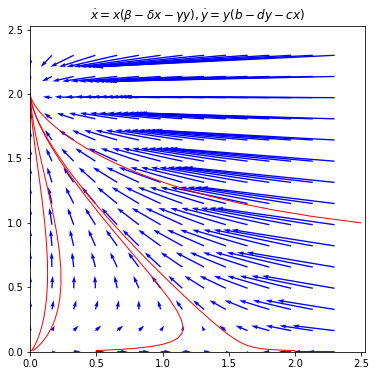

In [148]:
N = 2.3
xlim = (0, N)
ylim = (0, N)

beta, delta, gamma,  = 0.8, 0.5, 1.2
b, d, c = 1, 0.5, 0

def dx_dt(x, t):
    return [x[0]*(beta - delta*x[0] - gamma*x[1]), x[1]*(b - d*x[1] - c*x[0])]

plt.figure(figsize=(6, 6))
plt.title('$\\dot{x} = x(\\beta - \\delta x - \\gamma y), \\dot{y} = y(b - dy - cx)$')

plot_traj([0.01, 0.01], dx_dt, fw=0, bw=20)
plot_traj([0.02, 0.01], dx_dt, fw=0, bw=30)
plot_traj([0.5, 0.01], dx_dt, fw=0, bw=30)
plot_traj([2, 0.01], dx_dt, fw=10, bw=0)
plot_traj([2.5, 1], dx_dt, fw=10, bw=0)

plot_field(dx_dt, xlim, scale=10)

plt.xlim(np.array(xlim) * 1.1)
plt.ylim(np.array(ylim) * 1.1)

plt.show()